Here, we will use the penguins dataset to look at distributions and 'part to whole'. It is one of the built-in datasets in seaborn, which also includes anagrams, anscombe, attention, brain_networks, car_crashes*, diamonds*, dots, exercise*, flights, fmri, gammas, geyser, iris*, mpg*, penguins*, planets, taxis*, tips*, titanic*

We import our packages, load our dataset and take a look at some of the key aspects of it in the following blocks.

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
data = sns.load_dataset('penguins')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Let's get rid of the nulls, check again to see if there are any, then look at the top of the dataset again.

In [6]:
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True)
data['sex'].fillna(data['sex'].value_counts().index[0], inplace=True)
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


Now let's look at some distribution and part to whole graphs.

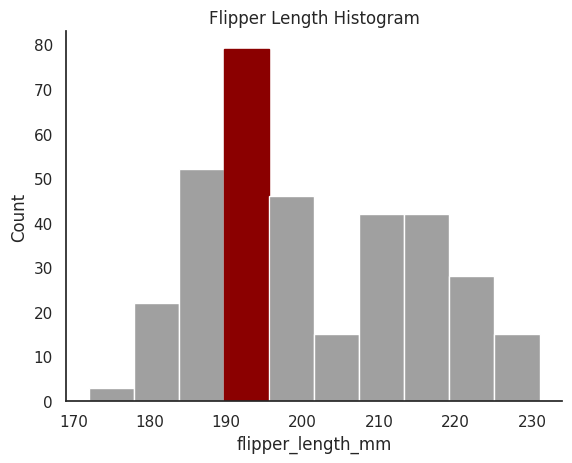

In [11]:
#HISTOGRAM
sns.set_theme(style="white", rc={"axes.spines.right" : False, "axes.spines.top" : False}, font="DejaVu Sans")
ax = sns.histplot(x = "flipper_length_mm", color = "gray", data = data)
heights = [p.get_height() for p in ax.patches]
highest = sorted(heights)[len(heights)-1]
for p in ax.patches:
    if  p.get_height() == highest:
        p.set_color('darkred')
plt.title("Flipper Length Histogram")
plt.show()

Text(0.5, 0.98, 'Flipper Length')

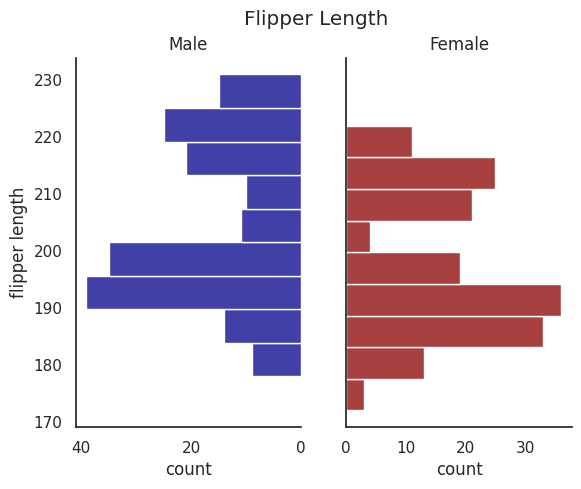

In [12]:
#HISTOGRAM (multiple, pyramid)
fig, ax = plt.subplots(ncols=2, nrows=1, sharey = True)
sns.histplot(y = "flipper_length_mm", color = "darkblue", ax=ax[0], data = data[(data.sex == "Male")])
sns.histplot(y = "flipper_length_mm", color = "darkred", ax=ax[1], data = data[(data.sex == "Female")])
ax[0].invert_xaxis()
ax[0].set_title("Male")
ax[1].set_title("Female")
ax[0].set(xlabel="count", ylabel="flipper length") 
ax[1].set(xlabel="count", ylabel="")
fig.suptitle("Flipper Length")


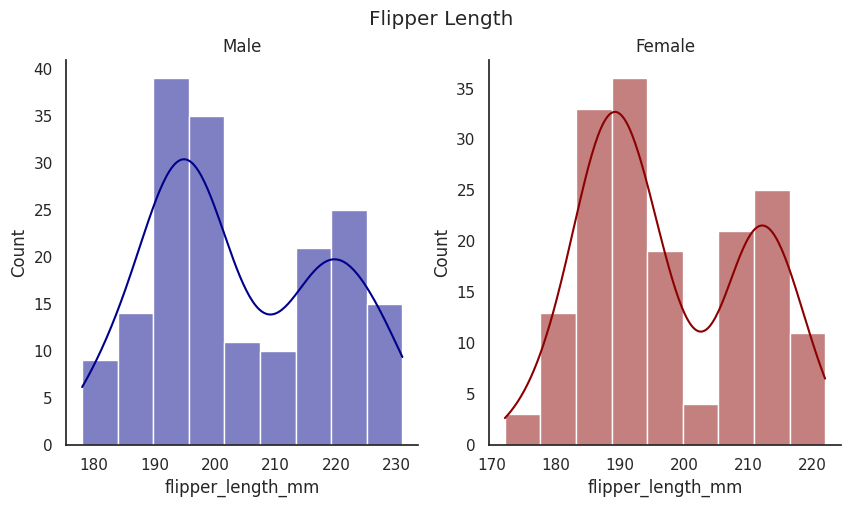

In [17]:
#HISTOGRAM with KDE and split out by gender
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
sns.histplot(ax = ax[0], x = "flipper_length_mm", kde = True, color = "darkblue", data = data[(data.sex == "Male")])
sns.histplot(ax = ax[1], x = "flipper_length_mm", kde = True, color = "darkred", data = data[(data.sex == "Female")])
ax[0].set_title("Male")
ax[1].set_title("Female")
plt.suptitle("Flipper Length")
plt.show()

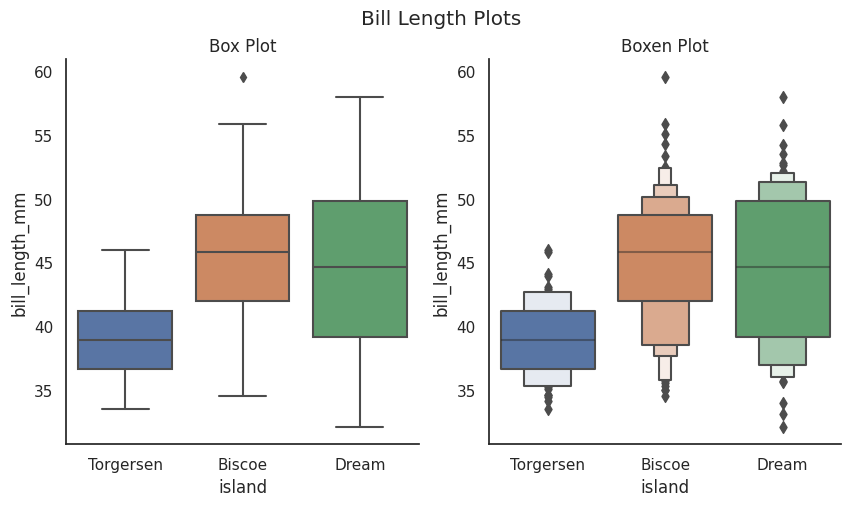

In [18]:
#BOX and BOXEN
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
#BOX
viz_box = sns.boxplot(data = data, x = "island", y = "bill_length_mm", ax = ax[0])
#BOXEN
viz_boxen = sns.boxenplot(data = data, x = "island", y = "bill_length_mm", ax = ax[1])
ax[0].set_title("Box Plot")
ax[1].set_title("Boxen Plot")
plt.suptitle("Bill Length Plots")
plt.show()

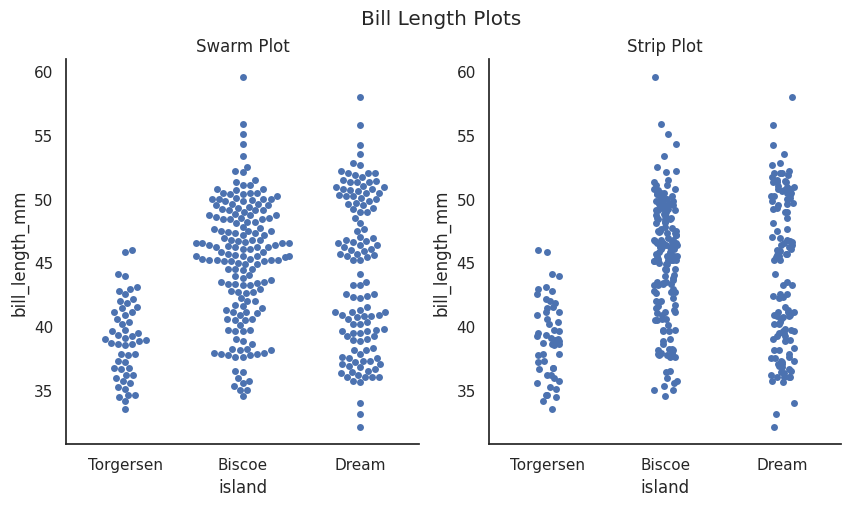

In [19]:
#SWARM and STRIP
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
#SWARM
viz_swarm = sns.swarmplot(data = data, x = "island", y = "bill_length_mm",  ax = ax[0])
#STRIP
viz_strip = sns.stripplot(data = data, x = "island", y = "bill_length_mm",  ax = ax[1])
ax[0].set_title("Swarm Plot")
ax[1].set_title("Strip Plot")
plt.suptitle("Bill Length Plots")
plt.show()

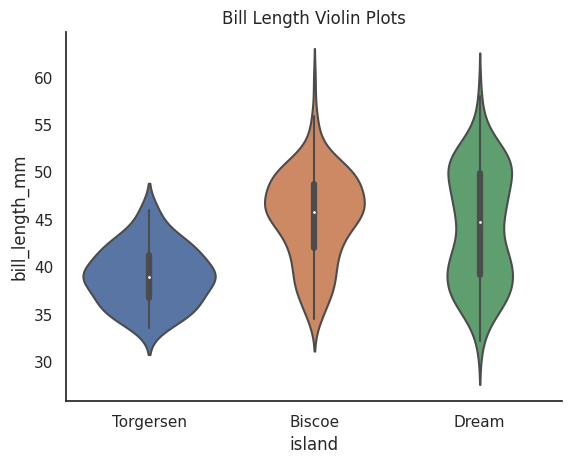

In [20]:
#VIOLIN
viz_violin = sns.violinplot(data = data, x = "island", y = "bill_length_mm")
plt.title("Bill Length Violin Plots")
plt.show()

C:\Users\hruss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\hruss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\hruss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


Text(0.5, 0.98, 'Flipper Length Ridgeline Plot')

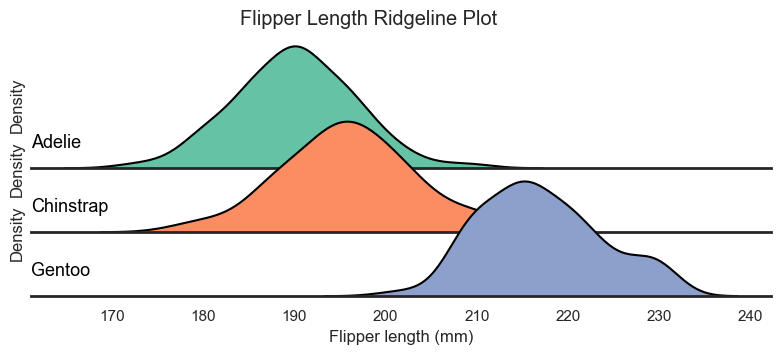

In [21]:
#RIDGELINE
species = ['Adelie', 'Chinstrap', 'Gentoo']
df_filtered = data[data['species'].isin(species)]
df_filtered
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df_filtered, palette=palette, row="species", hue="species", aspect=7, height=1.2)
g.map_dataframe(sns.kdeplot, x="flipper_length_mm", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="flipper_length_mm", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "species")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Flipper length (mm)")
g.despine( left=True)
plt.suptitle('Flipper Length Ridgeline Plot', y=0.98)

In [23]:
#In case you need to group data for a viz
data_group = data.groupby('species').count()
data_group = data_group.reset_index()
data_group.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,152,152,152,152,152,152
1,Chinstrap,68,68,68,68,68,68
2,Gentoo,124,124,124,124,124,124


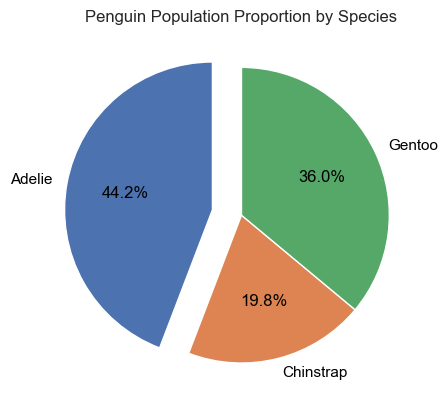

In [24]:
#PIEPLOT
data_group = data.groupby('species').count()
data_group = data_group.reset_index()
values = data_group['island']
labels = data_group['species']
plt.pie(values, labels = labels, radius = 1, startangle = 90, 
    explode = [0.2, 0.0, 0.0], textprops=dict(color="black"), autopct='%1.1f%%')
plt.title("Penguin Population Proportion by Species")
plt.show()

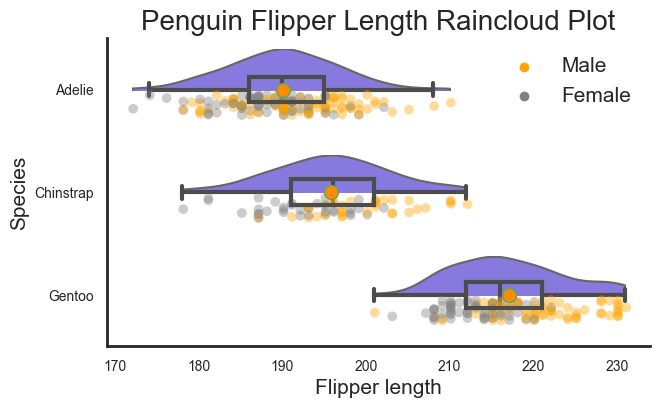

In [26]:
#RAINCLOUD
def add_cosmetics(title='Penguin Flipper Length Raincloud Plot', xlabel='Flipper length', ylabel='Species'):
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.despine()
plt.figure(figsize=(7, 4))
# Create violin plots without mini-boxplots inside.
ax = sns.violinplot(x='flipper_length_mm', y='species', data=data, color='mediumslateblue', cut=0, inner=None)
# Clip the lower half of each violin.
for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2, transform=ax.transData))
# Create strip plots with partially transparent points of different colors depending on the group.
num_items = len(ax.collections)
sns.stripplot(x='flipper_length_mm', y='species', hue='sex', data=data, palette=['orange', 'gray'], alpha=0.4, size=7)
# Shift each strip plot strictly below the correponding volin.
for item in ax.collections[num_items:]: item.set_offsets(item.get_offsets() + 0.15)
# Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
sns.boxplot(x='flipper_length_mm', y='species', data=data, width=0.25, showfliers=False, showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='darkorange', markersize=10, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), linewidth=3, zorder=3), whiskerprops=dict(linewidth=3), 
            capprops=dict(linewidth=3), medianprops=dict(linewidth=3))
plt.legend(frameon=False, fontsize=15, loc='upper right')
add_cosmetics()


In [27]:
#TREEMAP
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
data2 = {'labels': ["A","B","C","D","E","F","G"],
        'values':[10,20,25,35,10,25,45]}
df = pd.DataFrame(data2)
fig = px.treemap(df, path=['labels'],values='values', width=400, height=200, title = "Random Treemap: Color = Relative Value")
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25))
fig.show()

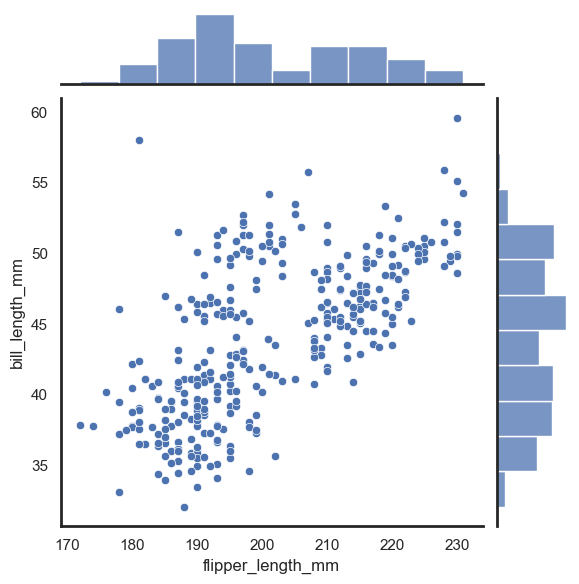

In [28]:
sns.jointplot(data=data, x = "flipper_length_mm", y = "bill_length_mm")


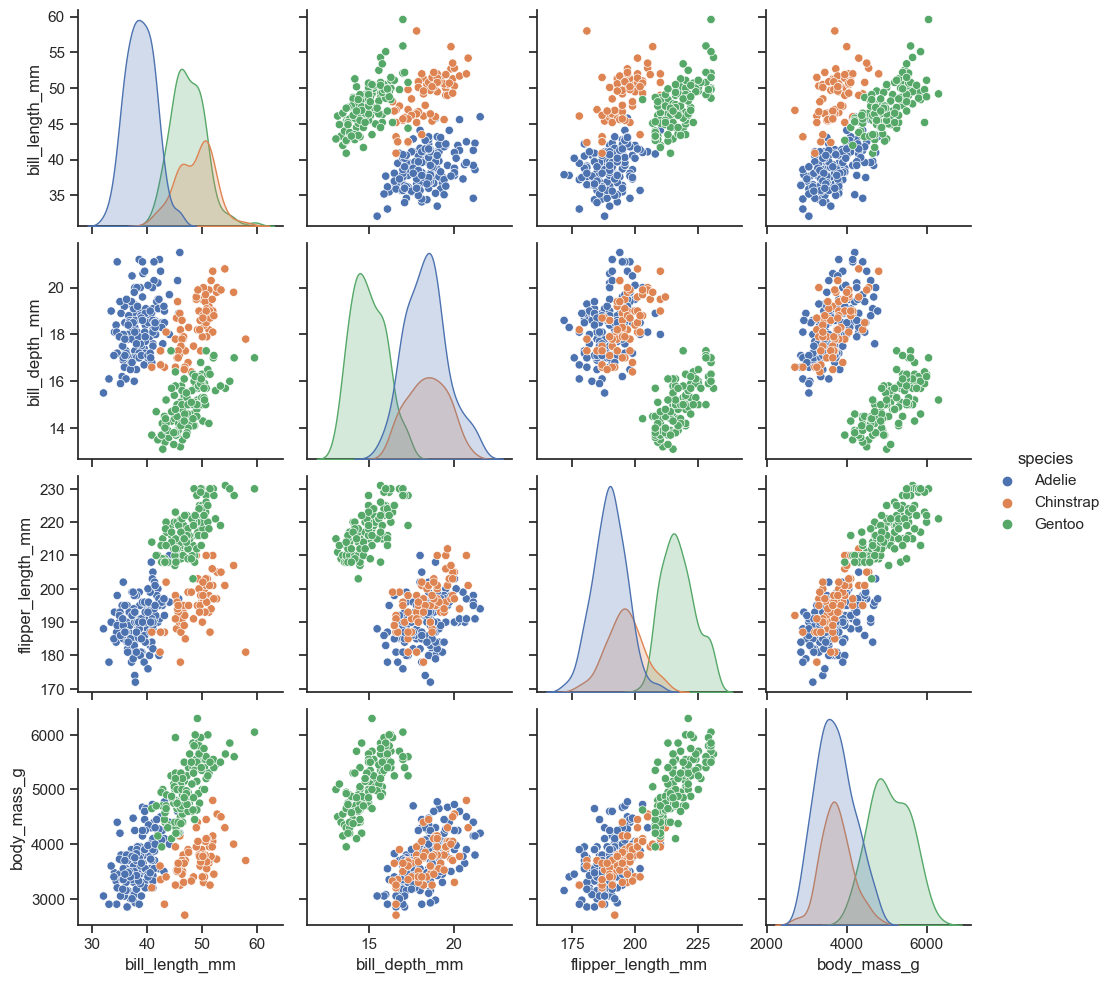

In [29]:
#PAIRPLOT
sns.set_theme(style="ticks")
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

<AxesSubplot: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

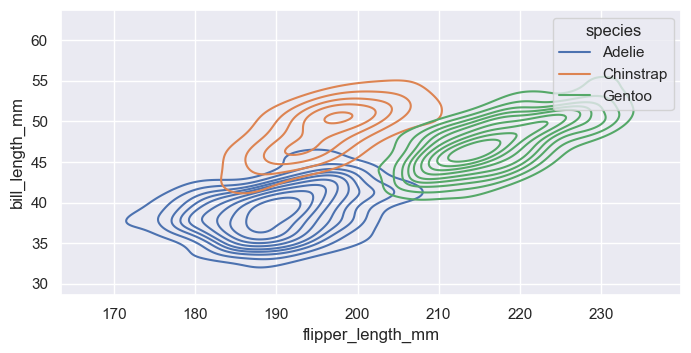

In [30]:
#KDE PLOT
sns.set_theme(style="darkgrid")
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
# Draw a contour plot to represent each bivariate density
sns.kdeplot(data=data, x="flipper_length_mm", y="bill_length_mm", hue="species", thresh=.1)